# Compute gcorr diseases and phenotypes (ldscr)
###### Created 03/08/2022
###### Last modification 10/10/2022

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join
from datetime import datetime

In [56]:
high_med_conf= True
path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gcorr_diseases/2022_08_03_ventile5/'

traits_phenos = ["DF_artery" , "DF_vein" , "D_A_std" , "D_V_std" ,
                    "bifurcations" , "VD_orig_artery" , "VD_orig_vein" , "ratio_VD" , 
                    "mean_angle_taa" , "mean_angle_tva" , "eq_CRAE" , "eq_CRVE" , 
                     "ratio_CRAE_CRVE", "medianDiameter_artery" , "medianDiameter_vein" , 
                 "ratio_AV_medianDiameter", "ratio_AV_DF"]

traits_phenos_new= ["DF_artery" , "DF_vein" , "D_A_std" , "D_V_std" ,
                    "bifurcations" , "VD_orig_artery" , "VD_orig_vein" , "ratio_VD" , 
                    "mean_angle_taa" , "mean_angle_tva" , "eq_CRAE" , "eq_CRVE" , 
                     "ratio_CRAE_CRVE", "medianDiameter_artery" , "medianDiameter_vein" , 
                 "ratio_AV_medianDiameter", "ratio_AV_DF"]

if high_med_conf:
    diseases_traits = {
        '4079':'DBP',
        '4080':'SBP',
        #'102':'PR',
        '30760':'HDL cholesterol',
        '1558':'Alcohol intake freq',
        '21021':'Pulse wave arterial stiffness',
        '30780':'LDL direct',
        '30870':'Triglycerides'
        }

else:
    diseases_traits = {
        '4079':'DBP',
        '4080':'SBP',
        #'102':'PR',
        '1558':'Alcohol intake freq',
        '21021':'Pulse wave arterial stiffness',
        #'40000':'Date death',
        #'42020':'Date AD',
        '30760':'HDL cholesterol',
        '30780':'LDL direct',
        '30870':'Triglycerides',
        '2976':'Age diabetes',
        '3627':'Age angina',
        '3894':'Age heart attack',
        '4012':'Age DVT',
        '4056':'Age stroke',
        '40007':'Age death',
        #'4689':'Age glaucoma',
        '4700':'Age cataract',
        #'5408':'Amblyopia',
        '5610_1':'Presbyopia 1',
        '5610_2':'Presbyopia 2',
        '5610_3':'Presbyopia 3',
        '5832_3':'Hypermetropia 3',
        '5843_1':'Myopia 1',
        '5843_2':'Myopia 2',
        '5843_3':'Myopia 3',
        '5855_1':'Astigmatism 1',
        '5855_2':'Astigmatism 2',
        '5855_3':'Astigmatism 3',   
        #'5890':'Diabetes eye',
        #'5945':'Eye other',
        '1717':'Skin colour',
        '1747_1':'Hair colour 1',
        '1747_2':'Hair colour 2',
        '1747_3':'Hair colour 3',
        '1747_4':'Hair colour 4',
        '1747_5':'Hair colour 5',
        '1747_6':'Hair colour 6'
        #'4022':'Age pulmonary embolism',
        #'131380':'Circulatory sys dis',
        #'131390':'Other art dis'
        }

#KeyError: "['4022', '4689', '5890', '5945', '131380', '131390', '42020', '5408', '40000', '102'] not in index"

traits_all = list(diseases_traits.keys())
traits_phenos_new = list(diseases_traits.values())

In [57]:
# path This we can read from config
def try_to_compute_all(traits_all):
    path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gcorr_diseases/2022_08_03_ventile5/'
    save_path = path
    l_diseases_all=[]
    for trait in traits_all:
        #print(trait)
        for file in os.listdir(path):
            #print(file, '\n')
            if file.startswith(trait):
                if file.endswith('.tsv'):
                    #print('PHENO', trait)
                    #print(file, '\n')
                    df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'].iloc[0])
                    print(file)
                    data={
                        'pheno':  trait,
                        'file':  file
                        #,'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno= trait + '__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))
    return df_diseases_all

df_diseases_all = try_to_compute_all(traits_all)

4079_irnt.ldsc.imputed_v3.both_sexes.tsv
4080_irnt.ldsc.imputed_v3.both_sexes.tsv
30760_irnt.imputed_v3.ldsc.both_sexes.tsv
1558.ldsc.imputed_v3.both_sexes.tsv
21021_irnt.ldsc.imputed_v3.both_sexes.tsv
30780_irnt.imputed_v3.ldsc.both_sexes.tsv
30870_irnt.imputed_v3.ldsc.both_sexes.tsv
24 17 7


In [58]:
df_diseases_all.head(5)

,pheno,file
0,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv
1,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv
2,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv
3,1558,1558.ldsc.imputed_v3.both_sexes.tsv
4,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv


In [59]:
traits_reduced = list(diseases_traits.keys())

#datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_irnt = [ dat for dat in df_diseases_all['file']]
datafields_pheno = [ dat + "__munged.sumstats.gz" for dat in traits_phenos]
diseasess_tra_aux = [ dat for dat in df_diseases_all['pheno']]

traits_col_index = traits_phenos + diseasess_tra_aux
traits_names = datafields_pheno + datafields_irnt

In [60]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [79]:
# filter the files names containing 2 traits
def read_ldsr(traits_files, traits_col_index):
    df_cov=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_corr=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_std=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                #print(fp)
                #print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = round(float(split[ split.index('gencov:') +1 ]),2)
                        df_cov.iloc[j][i] = round(float(split[ split.index('gencov:') +1 ]),2)
                        #print(split)
                    if('Correlation:' in split):
                        #print(line)
                        #print(split)
                        df_corr.iloc[i][j] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        df_corr.iloc[j][i] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
                        df_std.iloc[i][j] = split[3]
                        df_std.iloc[j][i] = split[3]
    return df_cov, df_corr, df_std

df_cov, df_corr, df_std2 = read_ldsr(traits_names, traits_col_index)     

## - NOT SQUARED:

In [80]:
### Rename the diseases and the phenotypes AND remove the squared shape to avoid redundancy

In [81]:
def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    df.rename(index=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

def detele_col_index(df, l_cols_delete, l_rows_delete, l_diseases_new, l_phenos_old, l_phenos_new):
    df=df.drop(columns=l_cols_delete)
    df=df.drop(index=l_rows_delete)
    df= rename_col_index(df, l_rows_delete, l_diseases_new, l_phenos_old, l_phenos_new)
    
    return df


df_corr_simpl= detele_col_index(df_corr, traits_phenos, traits_reduced, list(diseases_traits.values()),traits_phenos, traits_phenos_new)
df_std_simpl = detele_col_index(df_std2,  traits_phenos, traits_reduced, list(diseases_traits.values()), traits_phenos, traits_phenos_new)
df_corr_simpl

,DBP,SBP,HDL cholesterol,Alcohol intake freq,Pulse wave arterial stiffness,LDL direct,Triglycerides
DF_artery,-0.04,-0.08,-0.02,-0.01,0.02,-0.01,-0.03
DF_vein,-0.02,-0.1,0.06,-0.07,-0,0.05,-0.01
D_A_std,0.12,0.11,0.05,-0.07,0.01,-0.01,-0.02
D_V_std,-0.13,-0.07,0.11,-0.09,-0.18,-0.04,-0.03
bifurcations,0.1,0.14,-0.01,-0.02,0.1,0.04,0.03
VD_orig_artery,0.2,0.2,-0.03,-0.02,0.11,-0.03,0.03
VD_orig_vein,-0,0.04,0,-0.03,0.02,0.03,0.03
ratio_VD,0.29,0.22,-0.03,-0.01,0.16,-0.05,-0
mean_angle_taa,-0.05,-0.01,0.05,-0.05,0.02,0.01,-0.05
mean_angle_tva,-0.09,-0.05,0.06,-0.04,-0.1,0.01,-0.06


In [82]:
### Round the std values
for col in df_std_simpl.columns:
    df_std_simpl[col] = df_std_simpl[col].str.replace("(", "", regex=True)
    df_std_simpl[col] = df_std_simpl[col].str.replace(")", "", regex=True)

df_std_simpl = df_std_simpl.astype(float)
df_std_simpl = df_std_simpl.round(2)
df_std_simpl

,DBP,SBP,HDL cholesterol,Alcohol intake freq,Pulse wave arterial stiffness,LDL direct,Triglycerides
DF_artery,0.03,0.03,0.03,0.03,0.05,0.04,0.03
DF_vein,0.03,0.03,0.03,0.03,0.06,0.05,0.03
D_A_std,0.03,0.03,0.03,0.03,0.05,0.04,0.03
D_V_std,0.04,0.04,0.02,0.03,0.06,0.07,0.05
bifurcations,0.03,0.03,0.03,0.03,0.06,0.05,0.03
VD_orig_artery,0.03,0.03,0.03,0.03,0.06,0.05,0.03
VD_orig_vein,0.03,0.03,0.03,0.03,0.06,0.05,0.03
ratio_VD,0.04,0.04,0.03,0.04,0.08,0.06,0.04
mean_angle_taa,0.04,0.04,0.03,0.04,0.09,0.06,0.04
mean_angle_tva,0.04,0.03,0.03,0.04,0.07,0.06,0.04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


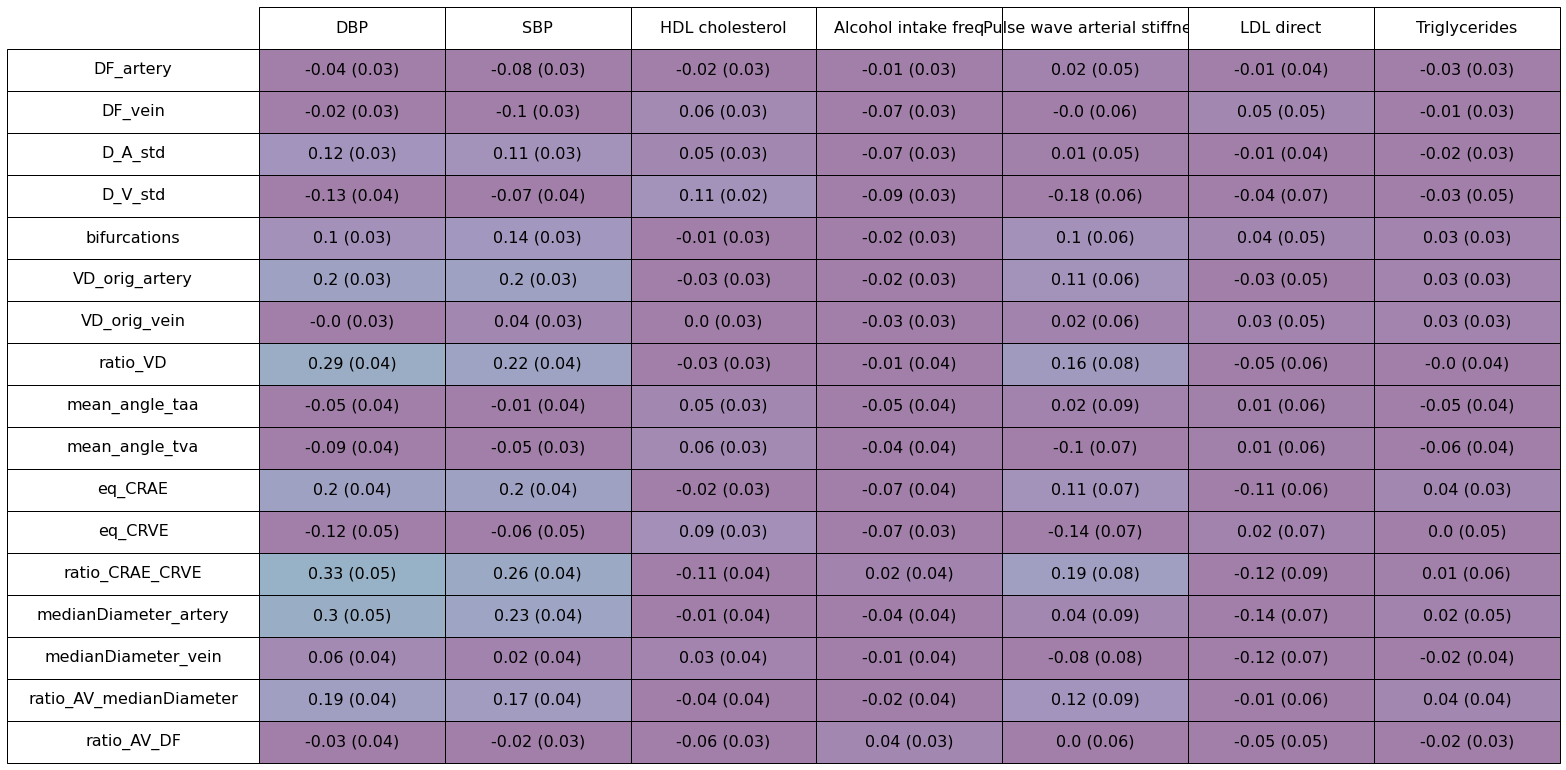

In [83]:
#print(df_reducida.columns, df_std.columns)
df = df_corr_simpl.astype(str) + ' (' + df_std_simpl.astype(str)+ ')'



df_corr_simpl_aux = df_corr_simpl.copy()
df_corr_simpl_aux = df_corr_simpl_aux.astype(float)

rcolors = plt.cm.Greys(np.full(len(df.index), 0.15))
ccolors = plt.cm.Greys(np.full(len(df.columns), 0.15))
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#create table
table = ax.table(cellText=df.values, 
                 #rowColours=rcolors,
                 colLabels=df.columns, 
                 rowLabels=df.index,
                 #colColours=ccolors,
                 rowLoc='center',
                 colLoc='center',
                 cellLoc='center',
                 cellColours=plt.cm.viridis(df_corr_simpl_aux.values, alpha=0.5),
                 loc='center',
                 fontsize=16,
                 colWidths=[0.15 for x in df.columns])


table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(3.7, 3.5) # make table a little bit larger
fig.tight_layout()
#plt.show()
#fig.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_diseases_gcorr.pdf', bbox_inches='tight',dpi=250)


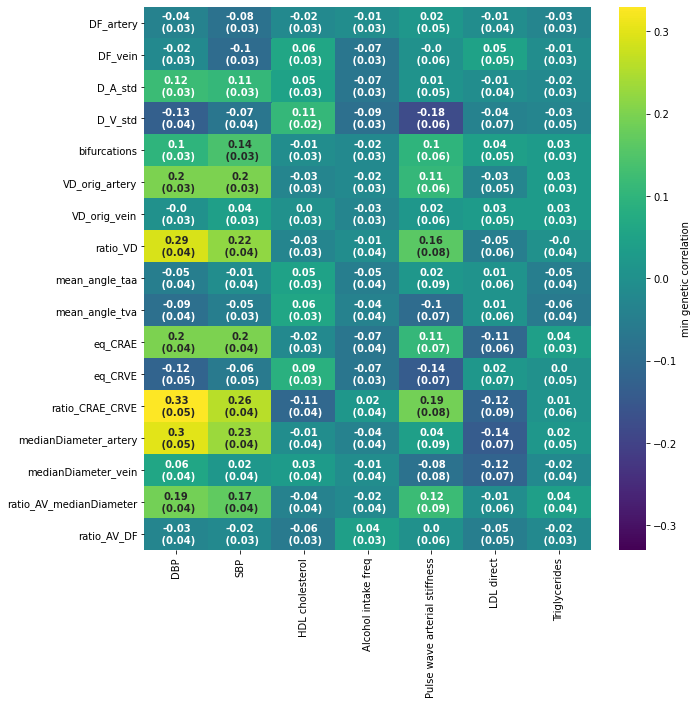

In [85]:
##min gcorr
df_corr_minus_std=abs(df_corr_simpl) - (df_std_simpl)


df = df_corr_simpl.astype(str) + '\n (' + df_std_simpl.astype(str)+ ')'

df_corr_simpl_aux = df_corr_simpl.astype(float)

plt.rcParams['font.size'] = '10'
figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val_2)
fig1 = sns.heatmap(df_corr_simpl_aux, 
            annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_simpl_aux).max().max(), 
            vmax=abs(df_corr_simpl_aux).max().max(), 
            cmap='viridis',alpha=1.0, cbar_kws={'label': 'min genetic correlation'},
            ax=ax)

## - SQUARED (all):

#### a) HEAT MAP all:

Text(0.5, 1.0, 'Genetic Correlation')

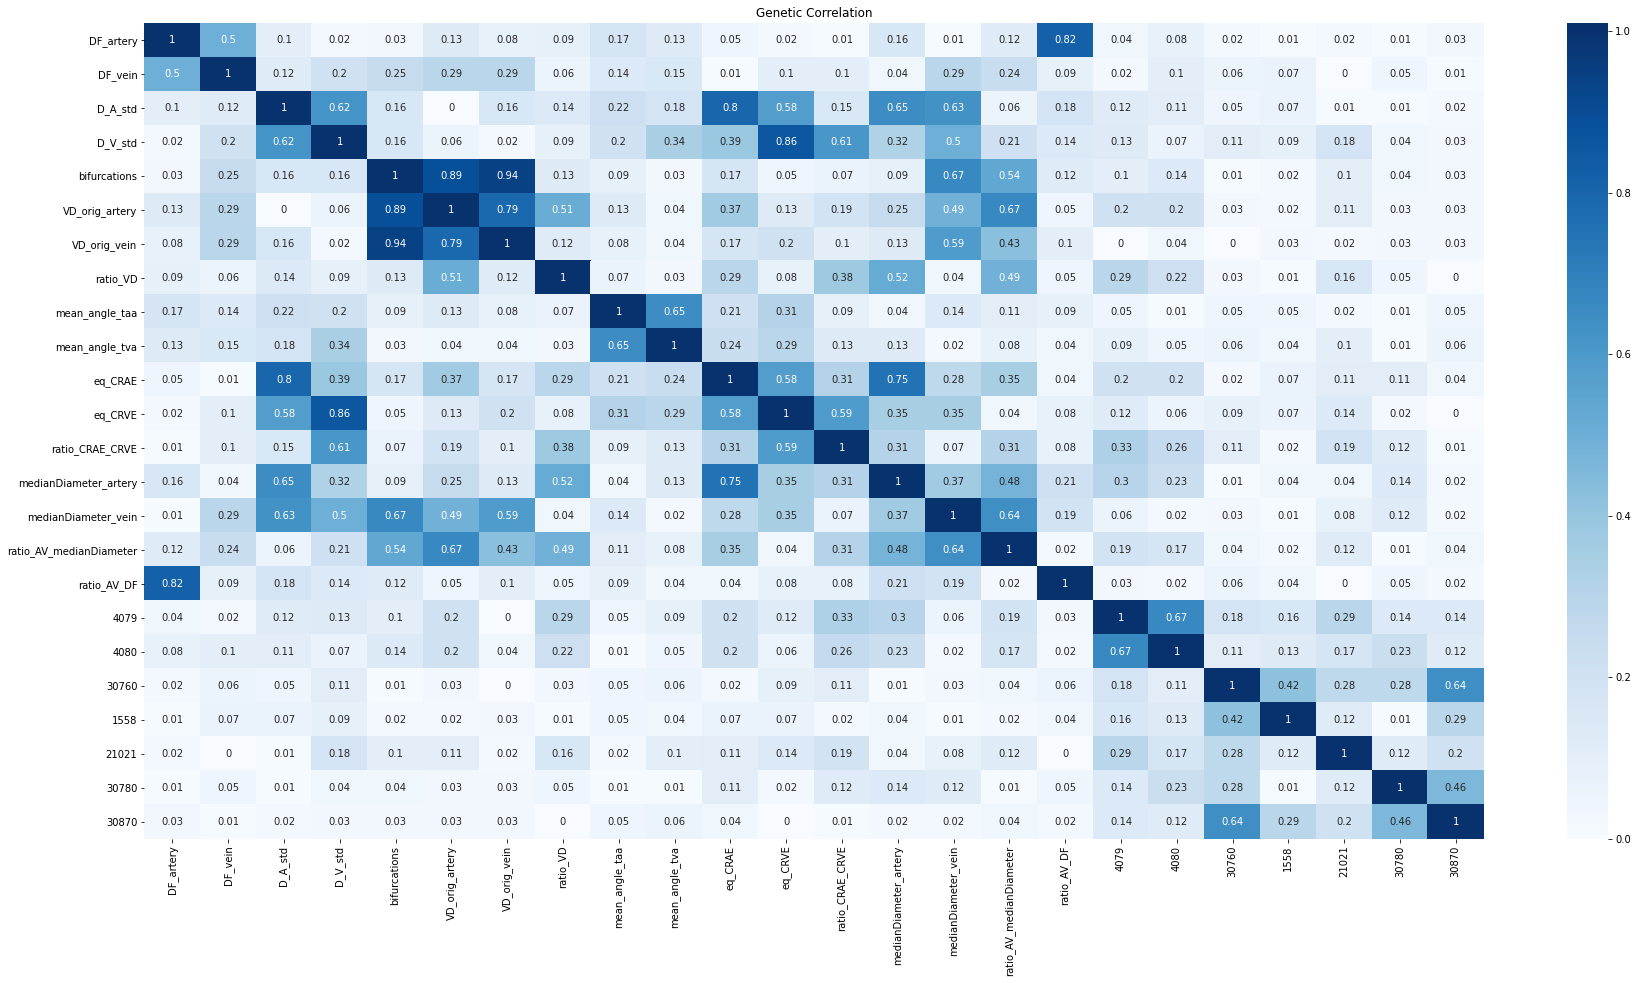

In [ ]:
##### PLOT
df_corr = df_corr.astype(float)
df_corr= df_corr.replace(np.nan, 0)

plt.figure(figsize=(30,15))
#plt.figure(figsize=(10,10))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_heatmap_diseases_gcorr.pdf', bbox_inches='tight', dpi=250)


#### b) pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
##### clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


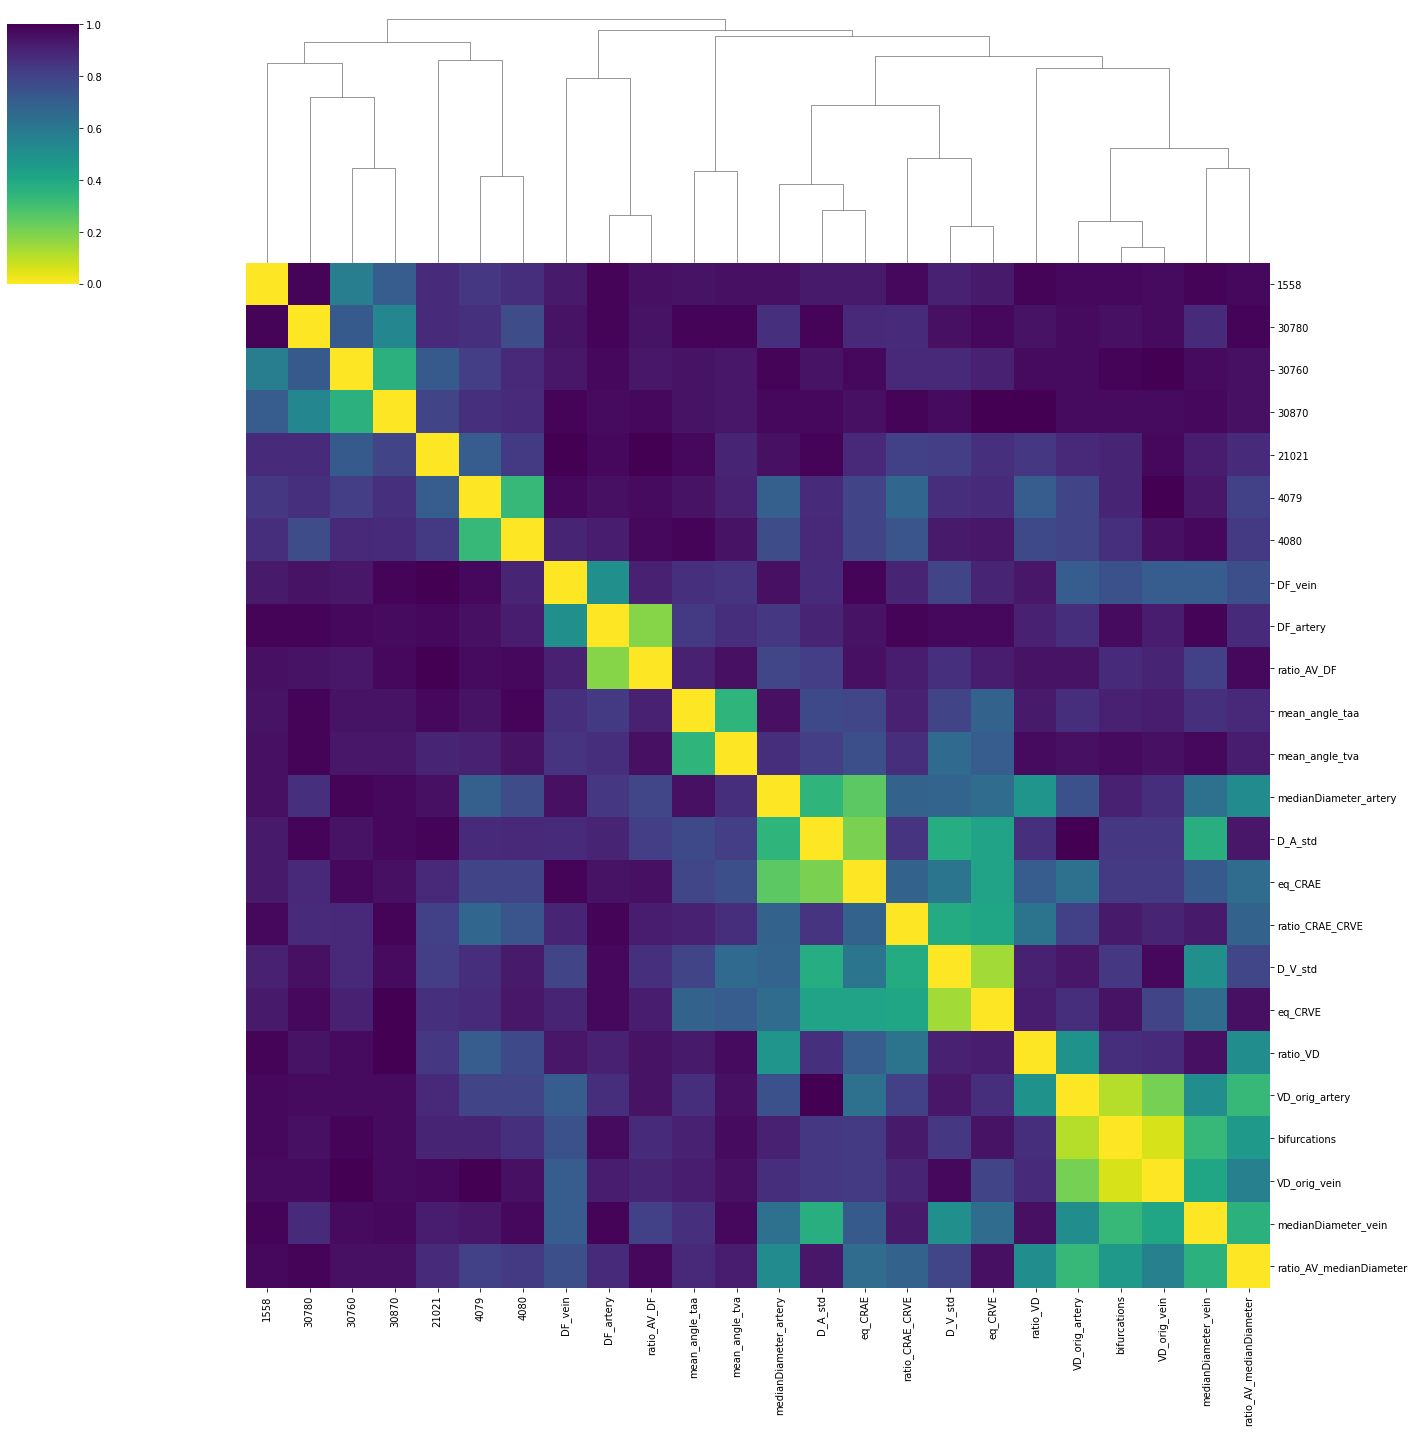

In [ ]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')